In [1]:
%pylab inline
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [2]:
#!python ../CM/orbit_cm.py MW1LMC4a1 0 51 LMCMCa1_orbit
#data/LMCMW/MW1LMC4/a0

In [116]:
Nbody1 = loadtxt('../CM/LMCMCa1_orbit.txt')
A1_host = loadtxt('../../../orbits/data/LMC_1E11_1E12_free_a1_host.txt')
A1_sat = loadtxt('../../../orbits/data/LMC_1E11_1E12_free_a1_sat.txt')

In [125]:
# Making Nbody and Analytic times equal

t1 = A1_host[:,0] 
# Defining galactocentric distances and velocities
x1 = A1_sat[:,1] - A1_host[:,1] 
y1 = A1_sat[:,2] - A1_host[:,2] 
z1 = A1_sat[:,3] - A1_host[:,3] 

vx1 = A1_sat[:,4] - A1_host[:,4] 
vy1 = A1_sat[:,5] - A1_host[:,5] 
vz1 = A1_sat[:,6] - A1_host[:,6] 

In [126]:
Rgal1 = np.sqrt(x1**2 + y1**2 + z1**2)
Vgal1 = np.sqrt(vx1**2 + vy1**2 + vz1**2)

In [127]:
R2vir1 = where(Rgal1 >= 280)[0]
IC1 = R2vir1[0]
#print Nbody_t[index[0]]
print IC1

1283


In [128]:
# Run with this ICs
print 'ICs:'
print 'positions: ',  x1[IC1], y1[IC1], z1[IC1]
print 'velocities: ', vx1[IC1], vy1[IC1], vz1[IC1]
dt = t1[IC1]
print dt

ICs:
positions:  43.490378 261.472044 -90.572333
velocities:  -20.21568 -177.004835 -5.972404
-1.283


In [132]:
t1 = t1 - dt

In [133]:
# Results from the Nbody
NB_t1 = Nbody1[:,0]
NB_R1 = Nbody1[:,1]
Xlmc1 = Nbody1[:,2]
Ylmc1 = Nbody1[:,3]
Zlmc1 = Nbody1[:,4]
Xmw1 = Nbody1[:,5]
Ymw1 = Nbody1[:,6]
Zmw1 = Nbody1[:,7]
NB_V1 = Nbody1[:,8]
vXlmc1 = Nbody1[:,9]
vYlmc1 = Nbody1[:,10]
vZlmc1 = Nbody1[:,11]
vXmw1 = Nbody1[:,12]
vYmw1 = Nbody1[:,13]
vZmw1 = Nbody1[:,14]


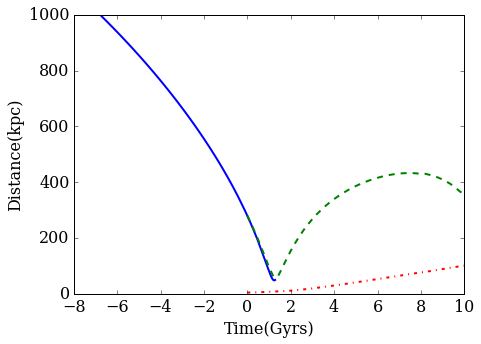

In [134]:
figure(figsize=(7, 5))
plot(t1, Rgal1, lw=2)
plot(NB_t1, NB_R1, lw=2, ls='--')
plot(NB_t1, np.sqrt(Xmw1**2 + Ymw1**2 + Zmw1**2), lw=2, ls='-.')
plt.ylabel('Distance(kpc)')
plt.xlabel('Time(Gyrs)')
#xlim(0, 2)
#ylim(0, 400)

176.080522 178.255588807
0.0


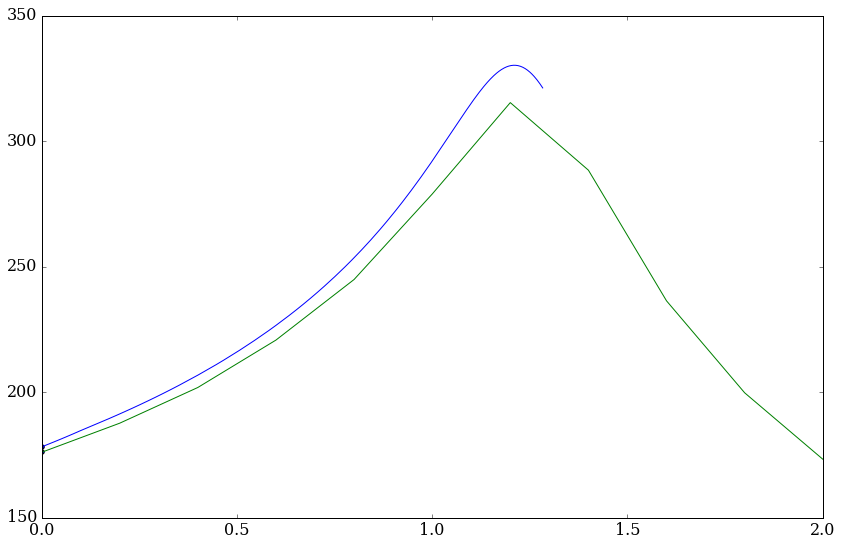

In [136]:
plot(t1, Vgal1)
plot(NB_t1, NB_V1)
xlim(0,2)
ylim(150, 350)
print NB_V1[0], Vgal1[IC1]
scatter(0, Vgal1[IC1])
scatter(0, NB_V1[0])
print t1[IC1]

In [53]:
peri1 = where(NB_V1==max(NB_V1))
peri05 = where(NB_V05==max(NB_V05))

In [61]:
print 'Galactocentric Distances of the Nbody Sim at Peri'
print Xlmc1[peri1]-Xmw1[peri1], Ylmc1[peri1]-Ymw1[peri1], Zlmc1[peri1]-Zmw1[peri1]
print 'Galactocentric Velocities of the Nbody Sim at Peri'
print vXlmc1[peri1]-vXmw1[peri1], vYlmc1[peri1]-vYmw1[peri1], vZlmc1[peri1]-vZmw1[peri1]

Galactocentric Distances of the Nbody Sim at Peri
[-12.623502] [ 7.852999] [ 56.578214]
Galactocentric Velocities of the Nbody Sim at Peri
[ 61.752459] [ 275.179073] [-141.089084]


In [78]:
#print 'Galactocentric Distances of the Nbody Sim at Peri'
#print Xlmc05[peri05]-Xmw1[peri05], Ylmc1[peri05]-Ymw1[peri05], Zlmc1[peri05]-Zmw1[peri05]
#print 'Galactocentric Velocities of the Nbody Sim at Peri'
#print vXlmc05[peri05]-vXmw1[peri05], vYlmc1[peri05]-vYmw1[peri05], vZlmc1[peri05]-vZmw1[peri05]

In [63]:
print 'Galactocentric Distances of the LMC at Peri Analytic'
print x1[0], y1[0], z1[0]
print vx1[0], vy1[0], vz1[0]

Galactocentric Distances of the LMC at Peri Analytic
-1.0 -41.0 -28.0
-57.0 -226.0 221.0


In [59]:
print 'MW CM displacement:'
print Xmw1[peri1], Ymw1[peri1], Zmw1[peri1]
print Xmw05[peri05], Ymw05[peri05], Zmw05[peri05]

MW CM displacement:
[ 7.] [-3.093711] [-2.306994]
[ 8.] [-3.508108] [-2.025734]


(0, 2)

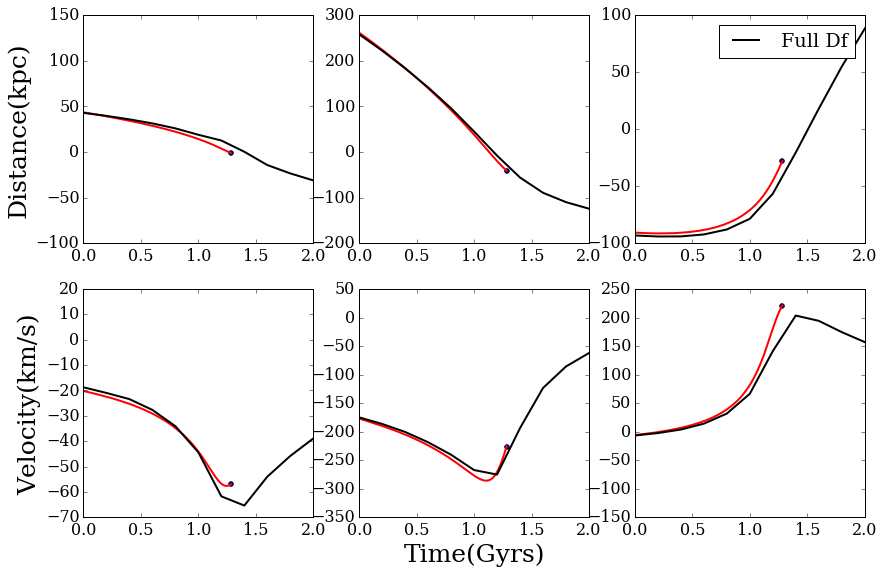

In [77]:
figure(figsize(14, 9))
plt.subplot(2, 3, 1)
plot(t1, x1, lw=2, ls='-', c='r')
#plot(t05, x05, lw=2, ls='--', c='b')
scatter(t1[0], x1[0])
plot(NB_t1, Xmw1-Xlmc1, lw=2, label='Full Df', c='k')
#plot(NB_t05, Xmw05-Xlmc05, lw=2, label='0.5 DF', c='b')
xlim(0, 2)
plt.ylabel('Distance(kpc)', fontsize=25)

plt.subplot(2, 3, 2)
plot(t1, y1, lw=2, ls='-', c='r')
scatter(t1[0], y1[0])
#plot(t05, y05, lw=2, ls='--', c='b')
plot(NB_t1, Ymw1-Ylmc1, lw=2, label='Full Df', c='k')
#plot(NB_t05, Ymw05-Ylmc05, lw=2, label='0.5 DF', c='b')
xlim(0, 2)
ylim(-200, 300)

plt.subplot(2, 3, 3)
plot(t1, z1, lw=2, ls='-', c='r')
scatter(t1[0], z1[0])
#plot(t05, z05, lw=2, ls='--', c='b')
plot(NB_t1, Zmw1-Zlmc1, lw=2, label='Full Df', c='k')
#plot(NB_t05, Zmw05-Zlmc05, lw=2, label='0.5 DF', c='b')
xlim(0, 2)
ylim(-100, 100)
legend()

plt.subplot(2, 3, 4)
plot(t1, vx1, lw=2, ls='-', c='r')
scatter(t1[0], vx1[0])
#plot(t05, vx05, lw=2, ls='--', c='b')
plot(NB_t1, vXmw1-vXlmc1, lw=2, label='Full Df', c='k')
#plot(NB_t05, vXmw05-vXlmc05, lw=2, label='0.5 DF', c='b')
plt.ylabel('Velocity(km/s)', fontsize=25)
xlim(0, 2)

plt.subplot(2, 3, 5)
plot(t1, vy1, lw=2, ls='-', c='r')
scatter(t1[0], vy1[0])
#plot(t05, vy05, lw=2, ls='--', c='b')
plot(NB_t1, vYmw1-vYlmc1, lw=2, label='Full Df', c='k')
#plot(NB_t05, vYmw05-vYlmc05, lw=2, label='0.5 DF', c='b')
xlim(0, 2)

plt.xlabel('Time(Gyrs)', fontsize=25)
plt.subplot(2, 3, 6)
plot(t1, vz1, lw=2, ls='-', c='r')
scatter(t1[0], vz1[0])
#plot(t05, vz05, lw=2, ls='--', c='b')
plot(NB_t1, vZmw1-vZlmc1, lw=2, label='Full Df', c='k')
#plot(NB_t05, vZmw05-vZlmc05, lw=2, label='0.5 DF', c='b')
xlim(0, 2)

